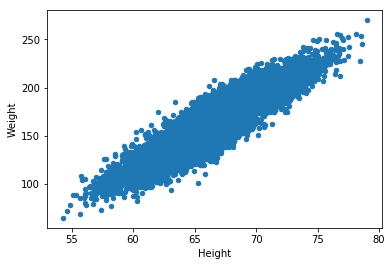

In [5]:
import pandas as pd
np = pd.np
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')

In [6]:
X = df[['Height', 'Weight']].values
y = (df.Gender == 'Female').astype(int)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [27]:
bias = 0
weights = np.random.randn(2).reshape(2,-1)
print(weights.shape)
print(X.shape)
learning_rate = .01
for epoch in range(10):
    ypred = np.dot(weights.T[0], X.T) + bias
    e = (ypred - y) 
    epsilon = weights.T[0] * 1e-6
    ypred2 = np.dot((weights + epsilon).T[0], X.T) + bias
    e2 = (ypred2 - y)
    gradient = (np.sqrt((e2 ** 2).sum()) - np.sqrt((e ** 2).sum())) / epsilon
    weights = weights + (0 - gradient) * learning_rate
    print(np.sqrt((e ** 2).sum()))
    
    
    

(2, 1)
(10000, 2)
136.592291461
68.9499090957
63.2358279136
62.1333288588
61.7449558711
61.5907595713
61.5268702595
61.4999441299
61.4885155754
61.4836503481


In [5]:
linearreg = LinearRegression(normalize=True)
linearreg = linearreg.fit(X, y)

In [6]:
linearreg.score(X, y)

0.64919062023668461

In [7]:
df['ypred_linear'] = linearreg.predict(X)
df['y'] = y
rmse = pd.np.sqrt(((df.ypred_linear - df.y) ** 2).mean())

In [8]:
linearreg.score??


In [9]:
((df.ypred_linear - df.y) ** 2).mean()  # wrong mean accuracy

0.087702344940828861

In [10]:
proportion_female = y.sum() / len(df)
proportion_female


0.5

In [11]:
logreg = LogisticRegression(class_weight=
    {0: 1 - proportion_female, 1: proportion_female})
logreg = logreg.fit(X, y)

In [12]:
logreg.score(X, y)

0.91949999999999998

In [13]:
df['ypred'] = logreg.predict(X)
correct_pred = df.ypred == y
correct_pred.sum() / df.shape[0]


0.91949999999999998

In [14]:
df['e_linear'] = df.ypred_linear - y

In [15]:
df['gender_int'] = (df.Gender == 'Female').astype(int)
X = df[['gender_int', 'Height']].values.astype(float)
y = df.Weight.values.reshape(-1, 1)
mvlr = LinearRegression(normalize=True)
mvlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
mvlr.score(X, y)

0.90274817292200915

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0055400f0>]], dtype=object)

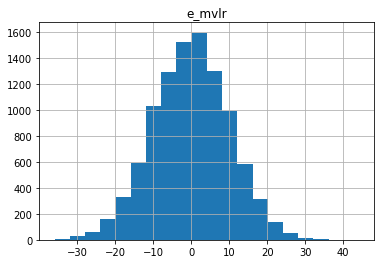

In [17]:
df['weightpred_mvlr'] = mvlr.predict(X)
df['e_mvlr'] = (df.weightpred_mvlr - df.Weight)
df[['e_mvlr']].hist(bins=20)

In [18]:
(df.e_mvlr ** 2).mean() ** .5 

10.012588345446908

In [26]:
df['square_height'] = df.Height ** 2

In [27]:
df.head()

,Gender,Height,Weight,ypred_linear,y,ypred,e_linear,gender_int,weightpred_mvlr,e_mvlr,log_height,predicted_weight_with_log,square_height
0,Male,73.847017,241.893563,-0.557098,0,0,-0.557098,0,215.833489,-26.060075,4.301996,215.912728,5453.381922
1,Male,68.781904,162.310473,0.584266,0,1,0.584266,0,185.559606,23.249134,4.230941,185.541468,4730.950324
2,Male,74.110105,212.740856,-0.052111,0,0,-0.052111,0,217.405952,4.665097,4.305552,217.492673,5492.307721
3,Male,71.730978,220.042470,-0.273460,0,0,-0.273460,0,203.186050,-16.856420,4.272923,203.213585,5145.333263
4,Male,69.881796,206.349801,-0.117180,0,0,-0.117180,0,192.133595,-14.216206,4.246805,192.128763,4883.465393


In [28]:
X = df[['gender_int', 'Height', 'square_height']]
y

array([[ 241.89356318],
       [ 162.31047252],
       [ 212.74085556],
       ..., 
       [ 128.47531878],
       [ 163.85246135],
       [ 113.64910268]])

In [29]:
mvlr = mvlr.fit(X, y)
df['predicted_weight_with_square'] = mvlr.predict(X)
df.head()

,Gender,Height,Weight,ypred_linear,y,ypred,e_linear,gender_int,weightpred_mvlr,e_mvlr,log_height,predicted_weight_with_log,square_height,predicted_weight_with_square
0,Male,73.847017,241.893563,-0.557098,0,0,-0.557098,0,215.833489,-26.060075,4.301996,215.912728,5453.381922,215.938977
1,Male,68.781904,162.310473,0.584266,0,1,0.584266,0,185.559606,23.249134,4.230941,185.541468,4730.950324,185.534658
2,Male,74.110105,212.740856,-0.052111,0,0,-0.052111,0,217.405952,4.665097,4.305552,217.492673,5492.307721,217.521942
3,Male,71.730978,220.042470,-0.273460,0,0,-0.273460,0,203.186050,-16.856420,4.272923,203.213585,5145.333263,203.220462
4,Male,69.881796,206.349801,-0.117180,0,0,-0.117180,0,192.133595,-14.216206,4.246805,192.128763,4883.465393,192.125380


In [31]:
mvlr.score(X, y)

0.90275045926673381

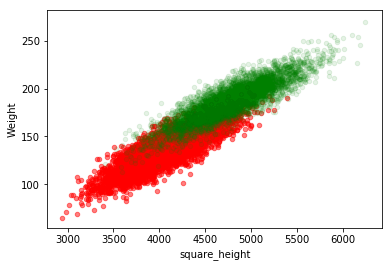

In [32]:
mask = df.Gender == 'Female'
ax = df[mask].plot(kind='scatter', alpha=.5, x='square_height', y='Weight', c='red')
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='square_height', y='Weight', c='green')

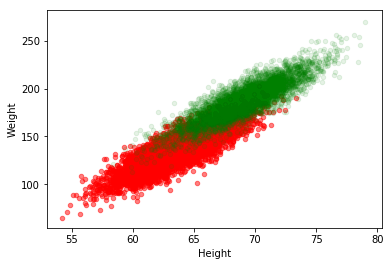

In [33]:
mask = df.Gender == 'Female'
ax = df[mask].plot(kind='scatter', alpha=.5, x='Height', y='Weight', c='red')
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='Height', y='Weight', c='green')